# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete [online documentation](https://scikit-learn.org/stable/documentation.html).
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a couple examples.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/11-01-Petal-sepal.jpg?raw=true" width="300" align="center"/>

 The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. For each sample, four features were measured: the lengths and the widths of the sepals and petals.

In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

In short, the expected layout of features and target values is visualized in the following diagram:

<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/11-01-samples-features.png?raw=true" width="700" align="center"/>

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn to conveniently visualize the data:

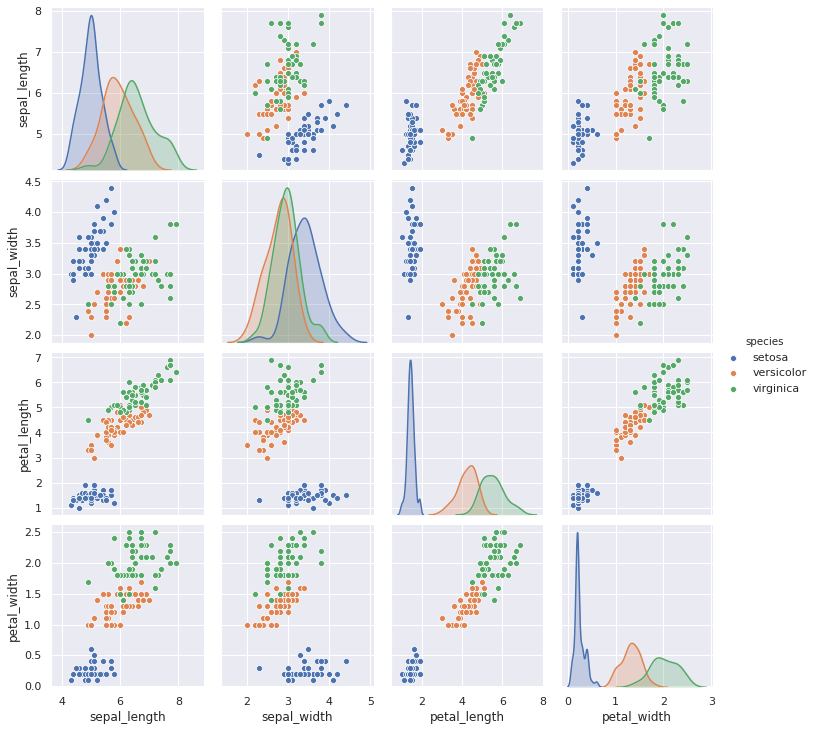

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations we've learned:

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper(2013)](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a couple of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through simple examples of applying supervised learning methods.

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following columns from `iris` for our regression example: `petal_width` & `petal_length`

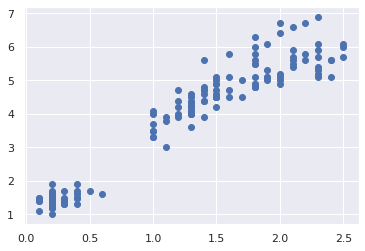

In [ ]:
X = iris[['petal_width']]
y = iris[['petal_length']]
plt.scatter(X, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process:

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [ ]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array). Our features matrix is also in the right shape since we only have 1 feature it is a matrix of size ``[n_samples, n_features]``.
Let's check the shapes:

In [ ]:
print(X.shape)
print(y.shape)

(150, 1)
(150, 1)


#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [ ]:
model.coef_

array([[2.2299405]])

In [ ]:
model.intercept_

array([1.08355803])

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2.2 and intercept of 1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of `x` values, and we will ask what `y` values the model predicts:

In [ ]:
xfit = np.linspace(0, 2.5)
xfit = pd.DataFrame(xfit)
xfit.shape

(50, 1)

We have coerced these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [ ]:
yfit = model.predict(xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

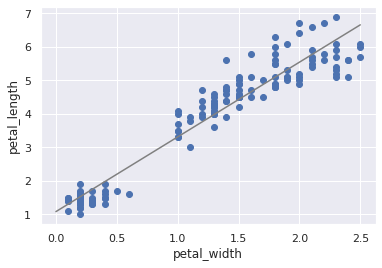

In [ ]:
plt.scatter(X, y)
plt.plot(xfit, yfit, c='gray')
plt.xlabel('petal_width')
plt.ylabel('petal_length');

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.3, random_state=833)

With the data arranged, we can follow our recipe to predict the labels:

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9333333333333333

With an accuracy topping 93%, we see that even this very naive classification algorithm is effective for this particular dataset!

To learn more about Gaussian naive Bayes check out [this YouTube video](https://www.youtube.com/watch?v=r1in0YNetG8).

# Your Turn
For this exercise we are going to make some predictions using Telco customer churn data. Our goal is to make a simple model that can predict whether a customer will churn or not based on the historical data. We will follow the steps above.

But first, let's load the data:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


There are some columns that contains empty string " ". Note there is a blank space. Find which column it is.

In [ ]:
# Your answer goes here
# Solution: (df == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Column `TotalCharges` has 11 rows with an empty string (" "). Replace these values by `0` as they represent new customers that haven't received a bill yet. Once you replaced the values, convert that column to a `float32` data type.

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-TotalCharges')

If we check the `df.info()` now we should see that `TotalCharges` is now a `float32`:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Before we get to splitting our dataset into train/test we would have to make sure all of our values are numerical as most of ML algorithms work with numerical values only.

### How to Convert Categorical Data to Numerical Data?
In order to do this we have to convert all of the categorical variables to numerical values. This can be done with a process called one-hot encoding. Take the "Churn" column as an example. We have two unique values: "Yes"/"No". One-hot encoding will create two variables, one called `Churn_Yes` and the other one `Churn_No`. We will go from

| Churn |
|--|
|Yes|
|No|
|Yes|
|...|

to

|Churn_Yes | Churn_No |
|--|--|
|1|0|
|0|1|
|1|0|
|...|...|

As you can see, having two variables is redundant since they mirror each other. So, in any one-hot encoding scenario, we need `n-1` variables for a categorical variable that had `n` categories.


There are two functions we can use to achieve this task. The first function is called `get_dummies()`, a convenient method provided by the `pandas` library. It quickly transforms categorical data into a format suitable for machine learning algorithms by creating binary columns for each category/label. The other function is `OneHotEncoder` from the `scikit-learn` library, which offers more flexibility and is especially useful in production-level pipelines.

While `get_dummies()` is more straightforward and returns a `DataFrame`, `OneHotEncoder` integrates seamlessly with other scikit-learn processes and returns a sparse matrix.

You will learn more about `OneHotEncoder` in the future, but for now we will use  `get_dummies()`. If we want *pandas* to automcatically drop one of the extra variables for us we use the `drop_first=True` argument.

In [ ]:
churn_df = df.drop('customerID', axis=1)  # dropping customerID as it doesn't have any predictive power
df_dummified = pd.get_dummies(churn_df, drop_first=True)  # One-hot encoding
df_dummified.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)  # renaming Churn_Yes to Churn
df_dummified.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.850000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.750000,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Using `df_dummified` dataframe, create two dataframes for features matrix and target vector and call them `X_df` and `y_df` respectively:

In [ ]:
# Your answer goes here
# X_df


In [ ]:
# Your answer goes here
# y_df


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-X_df-y_df')

Check their shape:

In [ ]:
# Your answer goes here


X_df: (7043, 30)
y_df: (7043,)


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-shape')

From `X_df` and `y_df` create the train/test splits.
* Set 30% of the data to test and the remainder to train.
* Use `random_state=833`, so you get the same result as in the notebook.
* Name the resulting objects: `Xtrain`, `Xtest`, `ytrain`, `ytest`.

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-split')

From `sklearn.naive_bayes` import `GaussianNB`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-import')

Instantiate a `GaussianNB` model and call it `model`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-model')

Fit model to data:

In [ ]:
# Your answer goes here


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-fit')

Now let's make some predictions. Use the `Xtest` feature dataframe to predict whether these customers are churning or not. Call the outcome (predictions) `y_model`:

In [ ]:
# Your answer goes here


array(['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype='<U3')

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-predict')

Accuracy is not the most reliable metric when it comes to evaluating classification algorithms, but it's one of the most simple ones. Let's calculate it below:

In [ ]:
# Your answer goes here


Our model is 0.65 accurate!


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-accuracy')

### Is this model any good?

If we had said no one will churn, what the accuracy would have been?

We would have identified all the ones who didn't churn correctly, but missed all the ones who did actually churn. Let's calculate the accuracy for this simplistic model below:

hint: all you need to work with is `ytest`

In [ ]:
# Your answer goes here


0.7245622337908187

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-accuracy-base')

So, after all our ML model is not that great. But the scope of this exercise is not to fine-tune this model, but understand the pipeline and how to read the outcome. Let's continue with some simple questions.

How many people did we have in the test dataset?

Save it to a variable called `n_test`:

In [ ]:
# Your answer goes here


2113

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-test-size')

How many of these customers churned?

Save it to a variable and call it `P`:

In [ ]:
# Your answer goes here


582

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-churned')

How many true positives did the model generate? (True positive = correctly identified in the "positive" class. Take "Yes" as the positive class).

Save it to a variable and call it `TP`:

In [ ]:
# Your answer goes here


500

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-TP')

What is the true positive rate (or sensitivity)?

**Sensitivity** (also called the **true positive rate (TPR)**, the recall, or probability of detection in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). ~Wikipedia

$TPR=\frac{TP}{P}$, where $TP$ is ture positives and $P$ is count of all positives.

In [ ]:
# Your answer goes here


0.8591065292096219

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-sensitivity')

How many of the customers in the test set didn't churn?

Save it to `N`:

In [ ]:
# Your answer goes here


1531

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-N')

How many true negatives did the model generate? (True negative = correctly rejected).
Save a to a variable and call it `TN`:

In [ ]:
# Your answer goes here


870

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-TN')

What is the true negative rate (or specificity)?

**Specificity** (also called the **true negative rate**) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition). ~Wikipedia

$TNR=\frac{TN}{N}$, where $TN$ is ture negatives and $N$ is count of all negatives.

In [ ]:
# Your answer goes here


0.5682560418027433

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-specificity')

You may check out [this Wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) for more info on sensitivity and specificity.

<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/09-02-sensitivity.png?raw=true" width="400" align="center"/>